## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

## Importing Dataset




In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('feedback-nlp.csv')
dataset.head(1)

,Computer Networks (Feedback),Computer Networks (Satisfaction),Machine Learning (Feedback),Machine Learning (Satisfaction),Operating System (Feedback),Operating System (Satisfaction),Computer Organization & Architecture (Feedback),Computer Organization & Architecture (Satisfaction)
0,"The sessions were fine, but there was a lack o...",Neutral,It was an average experience overall; the facu...,Neutral,The faculty did not engage the class effective...,Negative,"The teaching style was acceptable, but the cou...",Neutral


In [ ]:
dataset.shape

(2000, 8)

## Computer Networks (Feedback)

In [ ]:
df_CN = dataset[['Computer Networks (Feedback)', 'Computer Networks (Satisfaction)']]
df_CN.head()

,Computer Networks (Feedback),Computer Networks (Satisfaction)
0,"The sessions were fine, but there was a lack o...",Neutral
1,The course was very well-structured and the fa...,Positive
2,The faculty did not engage the class effective...,Negative
3,The faculty did not engage the class effective...,Negative
4,The course was decent but could use more examp...,Neutral


In [ ]:
# Encoding Categorical Target: Computer Networks (Satisfaction)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_CN['Computer Networks (Satisfaction)'] = le.fit_transform(df_CN['Computer Networks (Satisfaction)'])

<ipython-input-6-e1f365e0e78d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN['Computer Networks (Satisfaction)'] = le.fit_transform(df_CN['Computer Networks (Satisfaction)'])


In [ ]:
df_CN.head()

,Computer Networks (Feedback),Computer Networks (Satisfaction)
0,"The sessions were fine, but there was a lack o...",1
1,The course was very well-structured and the fa...,2
2,The faculty did not engage the class effective...,0
3,The faculty did not engage the class effective...,0
4,The course was decent but could use more examp...,1


### Data Preprocessing

In [ ]:
import re # regular expression import
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english') # storing stop word in all_stopwords
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus=[] # store students data post data cleaning

for i in range(0, 2000): # runs row by row to clean every data we have in our dataset
  review = re.sub('[^a-zA-Z]', ' ', df_CN['Computer Networks (Feedback)'][i]) # dropping all special symbols
  review = review.lower() # converting to lower case
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
# corpus

### Data Transformation

In [ ]:
# convert cleaned data into bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 8) # we are taking top 'max_features' most frequent tokens and dropping the left overs

In [ ]:
df_CN.head(2)

,Computer Networks (Feedback),Computer Networks (Satisfaction)
0,"The sessions were fine, but there was a lack o...",1
1,The course was very well-structured and the fa...,2


In [ ]:
X = cv.fit_transform(corpus).toarray()
y = df_CN.iloc[:, -1].values

In [ ]:
X.shape

(2000, 8)

In [ ]:
y.shape

(2000,)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Encoding 'Computer Networks (Satisfaction)'
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(sparse_output=False), [0])], remainder = 'passthrough')
y = np.array(ct.fit_transform(y.reshape(-1,1)))

### Splitting Dataset

In [ ]:
#%60 for train, %28 for val, %12 for test
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X, y, random_state=42, test_size= 0.4)

#Split test and val dataset.
X_val,X_test,Y_val,Y_test = train_test_split(X_val,Y_val,random_state = 42,test_size = 0.3)
print(f"{X_train.shape}, {X_test.shape}, {X_val.shape}")

# # Dimension Reduction
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 5)
# X_train = pca.fit_transform(X_train)
# X_val = pca.fit_transform(X_val)
# X_test = pca.transform(X_test)

(1200, 8), (240, 8), (560, 8)


### ANN Definition


In [ ]:
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential
def build_model():
    model = Sequential()
    #Input layer
    model.add(Dense(32, activation = "relu", kernel_initializer = "he_normal",input_dim = len(X_train[0])))
    #Hidden layer 1
    model.add(Dense(64, activation = "relu", kernel_initializer = "he_normal"))
    model.add(Dropout(0.3))
    #Hidden layer 2
    model.add(Dense(128, activation = "relu", kernel_initializer = "he_normal"))
    model.add(Dropout(0.3))
    #Hidden layer 3
    model.add(Dense(64, activation = "relu", kernel_initializer = "he_normal"))
    model.add(Dropout(0.3))
    #Hidden layer 4
    model.add(Dense(32, activation = "relu", kernel_initializer = "he_normal"))
    model.add(Dropout(0.3))
    #Output layer
    model.add(Dense(3, activation = "softmax", kernel_initializer = "he_normal"))
    return model

In [ ]:
model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,155 (82.64 KB)

 Trainable params: 21,155 (82.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
             loss = "categorical_crossentropy",metrics = ["accuracy"])

history = model.fit(X_train, Y_train, batch_size = 64, epochs = 200,
                         validation_data=(X_val,Y_val), callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3))

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.3762 - loss: 1.4389 - val_accuracy: 0.5589 - val_loss: 1.0726
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3383 - loss: 1.3835 - val_accuracy: 0.5482 - val_loss: 1.0420
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3880 - loss: 1.2831 - val_accuracy: 0.4643 - val_loss: 1.0261
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4242 - loss: 1.2013 - val_accuracy: 0.6464 - val_loss: 1.0153
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3892 - loss: 1.2163 - val_accuracy: 0.5696 - val_loss: 1.0038
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4001 - loss: 1.1988 - val_accuracy: 0.6339 - val_loss: 0.9940
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4359 - loss: 1.1424 - val_accuracy: 0.6339 - val_loss: 0.9837
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3967 - loss: 1.1574 - val_accuracy: 0

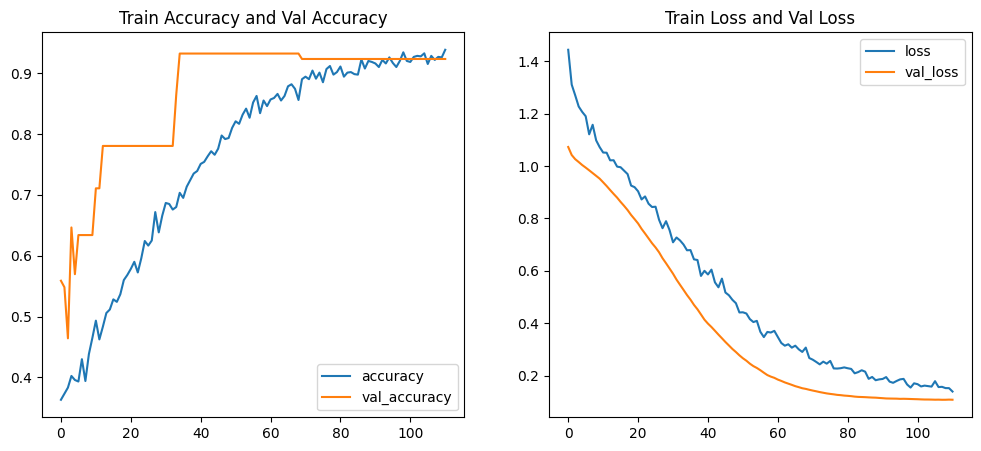

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,5))

epochs = len(history.history["accuracy"])
plt.subplot(1,2,1)
plt.title("Train Accuracy and Val Accuracy")
plt.plot(range(epochs),history.history["accuracy"])
plt.plot(range(epochs),history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])

plt.subplot(1,2,2)
plt.title("Train Loss and Val Loss")
plt.plot(range(epochs),history.history["loss"])
plt.plot(range(epochs),history.history["val_loss"])
plt.legend(["loss","val_loss"])

## Model Performance

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, average_precision_score

# Step 1: Evaluate the model on the test dataset
X_test_reshaped = X_test.reshape(-1, X_test.shape[1])
loss, accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f"Model Loss: {loss:.4f}")
print(f"Model Accuracy: {accuracy:.4f}")

# Step 2: Generate predictions
Y_pred = model.predict(X_test_reshaped)
Y_pred_classes = Y_pred.argmax(axis=1)
Y_test_classes = Y_test.argmax(axis=1)

# Step 3: Generate a detailed classification report
print('\n------------------------------------------------\n')
report = classification_report(Y_test_classes, Y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2'])
print("\nClassification Report:\n", report)

Model Loss: 0.1109
Model Accuracy: 0.9250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

------------------------------------------------


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.81      1.00      0.89        76
     Class 1       1.00      0.79      0.88        85
     Class 2       1.00      1.00      1.00        79

    accuracy                           0.93       240
   macro avg       0.94      0.93      0.93       240
weighted avg       0.94      0.93      0.92       240

